In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

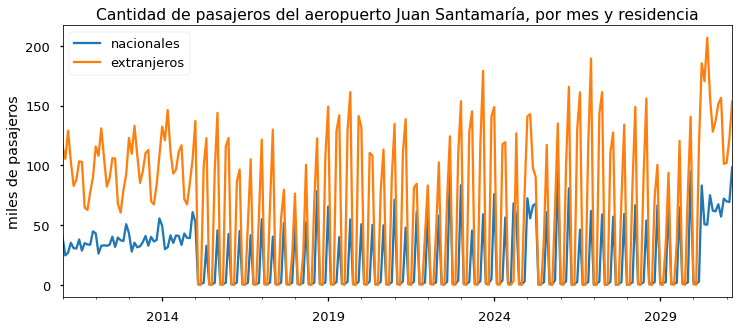

In [2]:
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Setiembre', 'Octubre', 'Noviembre', 'Diciembre']
mesescorto = [x[:3] for x in meses]
meses2 = {mes: i for i, mes in enumerate(meses, start=1)}

FILENAME = "datos/Datos-ARESEP-Pasajeros-por-aeropuerto.csv"
SJO = pd.read_csv(FILENAME)
SJO.replace(meses2, None,inplace=True)
SJO.sort_values(['Año','Mes'], inplace=True)
SJO.index = pd.period_range(start=f"{SJO['Año'].iloc[0]}-{SJO['Mes'].iloc[0]}", periods=SJO.shape[0], freq='M')
SJO.drop(['Aeropuerto', 'Mes', 'Año', 'Cantidad En Tránsito', 'Cantidad Exentos','Total Pasajeros'], axis=1,inplace=True)
SJO.rename(columns={'Cantidad Nacionales':'nacionales', 'Cantidad Extrajeros':'extranjeros'}, inplace=True)


# Gráficos de estacionalidad
sjodatos = SJO/1000

fig, ax = plt.subplots(figsize=[12,5])
sjodatos.plot(ax=ax)
ax.set(xlabel='',
       ylabel='miles de pasajeros',
       title='Cantidad de pasajeros del aeropuerto Juan Santamaría, por mes y residencia');